# Practice with Dictionaries & Counters

NLP Challenges to introduce Counters and practice more with dictionaries and lists.

## Counters

Counters are a subclass aka subtype of `Dictionaries`. They're useful for quickly counting / tallying things up.


Key difference from dictionaries
* return 0 count for missing items instead of returning a key error

In [1]:
from collections import Counter
# import the counter class from collections module

In [2]:
c = Counter(['eggs', 'ham'])
c

Counter({'eggs': 1, 'ham': 1})

In [3]:
# The key "green_eggs" does not exist in our counter
c['green_eggs']

0

Similar to dictionaries, you can retrieve elements with the key

In [4]:
c['eggs']

1

We can iterate values

In [5]:
c['eggs'] += 1

In [6]:
print(c['eggs'])

2


Usefulness of having a default key of zero

In [7]:
color_counts = Counter()

for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    color_counts[word] += 1

In [8]:
color_counts

Counter({'red': 2, 'blue': 3, 'green': 1})

# NLP Example

Practice with Lists, Dictionaries

In [9]:
book1_url = "https://raw.githubusercontent.com/khushmeeet/potter-nlp/master/final_data/book1.txt"

In [10]:
import requests

response = requests.get(book1_url)
data = response.text

### 1.Inspect the data

* What type of object is the `data` variable?
* What's the length of the `data` variable?
* How many words and characters?
* What does the text look like? (can you look at part / subset of the data?)

In [11]:
print(type(data))
print(f"{len(data):,} characters")
print(f"{len(data.split()):,}, words")
print("\nSample Text: \n\n",data[:1000])

<class 'str'>
430,856 characters
79,020, words

Sample Text: 

 the boy who lived mr. and mrs. dursley of number four privet drive were proud to say that they were perfectly normal thank you very much. they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense. mr. dursley was the director of a firm called grunnings which made drills. he was a big beefy man with hardly any neck although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors. the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about the potters. mrs. 

To count word occurances, we might want to split text from a single huge string to individual words or tokens. We could split using string split

In [12]:
# split the first 50 characters into tokens by their space character
data[1000:1100].split(" ")

['',
 'years',
 'in',
 'fact',
 'mrs.',
 'dursley',
 'pretended',
 'she',
 'didn’t',
 'have',
 'a',
 'sister',
 'because',
 'her',
 'sister',
 'and',
 'her',
 'good-for-n']

In [13]:
data[1801:2140]

' a screaming dudley into his high chair. none of them noticed a large tawny owl flutter past the window. at half past eight mr. dursley picked up his briefcase pecked mrs. dursley on the cheek and tried to kiss dudley good-bye but missed because dudley was now having a tantrum and throwing his cereal at the walls. “little tyke,” chortled'

### 3. Correct some mistakes

We realize that our naive tokenization (splitting our full text string into individual words made some errors.

In [14]:
# Dictionary mapping a substring to its replacement
corrections = {'mr. and mrs. dursley': 'the_dursleys',
               'mr. dursley': 'mr_dursley',
               'mrs. dursley': 'mrs_dursley'
              }
#['mr. dursley', 'mrs. dursley', 'the dursleys']
for k, v in corrections.items():
    data = data.replace(k, v)

In [15]:
list(corrections.values())

['the_dursleys', 'mr_dursley', 'mrs_dursley']

### 4. Split data into tokens

Make a list of strings, where each element of the list contains a word in the `data` variable. To simplify things we can split words on space character only.

In [16]:
data = data.split(" ")
print(f"{len(data):,}")

78,980


### 4. How many times does each characters name appear?

In [17]:
hp_chars = list(corrections.values()) + ['harry', 'hagrid', 'dumbledore', 'hermione','ron']

In [18]:
char_counts = Counter()

for tok in data:
    if tok in hp_chars:
        char_counts[tok] += 1

In [19]:
print(char_counts)

Counter({'harry': 1046, 'ron': 325, 'hagrid': 277, 'hermione': 207, 'dumbledore': 107, 'mr_dursley': 29, 'mrs_dursley': 13, 'the_dursleys': 2})


### 5. Plot your results

Read the documentation for Seaborn barplot to learn how to make a chart: https://seaborn.pydata.org/generated/seaborn.barplot.html

There's some helper code to convert our dictionary into a new object type a Pandas `DataFrame` to match the Seaborn documentation and examples.

In [20]:
import seaborn as sns
import pandas as pd

In [21]:
# we're going to make a DataFrame object from our dictionary
data = pd.DataFrame(char_counts.values(), char_counts.keys())
# I'm renaming the columns and resetting the index to match the Seaborn tutorial
data = data.reset_index().rename(columns={'index': 'character', 0:'num_occurances'})

Now we have a DataFrame with one row for each character, and two columns `character` and `num_occurances`

In [22]:
data

,character,num_occurances
0,the_dursleys,2
1,mr_dursley,29
2,mrs_dursley,13
3,harry,1046
4,dumbledore,107
5,hagrid,277
6,ron,325
7,hermione,207


In [23]:
# We can remove harry from the dataset if we want
# df = df[df['character'] != 'harry']

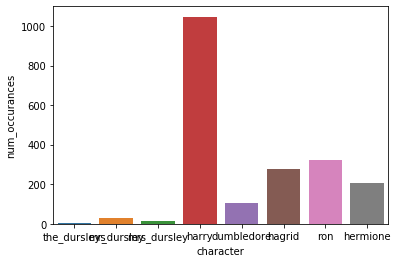

In [24]:
ax = sns.barplot(x="character", y="num_occurances", data=data)